In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [17]:
df_whole = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_read_counts.csv', index_col=0),
                      pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/components_four_read_counts.csv', index_col=0)])

In [4]:
len(population_dictionary.keys())

12

In [5]:
large_populations, size = [], []
for i, population in enumerate(population_dictionary.keys()):
    samples = population_dictionary_stripped[population]
    df_tmp = df_whole.ix[samples].dropna()
    if len(df_tmp) > population_size_cutoff:
        print population, len(df_tmp)
        large_populations.append(population)
        size.append(len(df_tmp))

2017_dbGap_phs000254.v2.p1_NHLBILungCF 227
TCGA 1929
TCGA_agilent 725
2017_dbGap_phs000209.v13.p3_MESA 541
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 110
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 291
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 344
2017_dbGap_phs000422.v1.p1_NHLBILungA 182


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

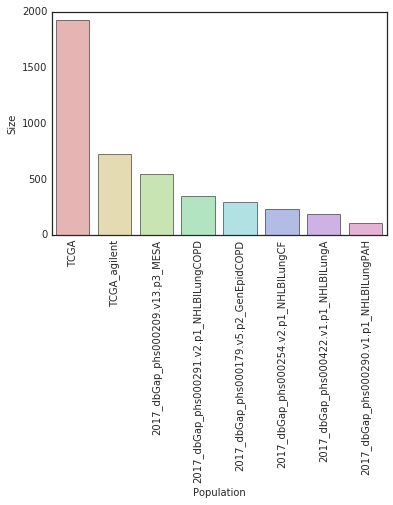

In [6]:
# Plot counts for each population
plotting_df = pd.DataFrame({'Population': large_populations,
                            'Size': size})
plotting_df = plotting_df.sort_values('Size', ascending=False)
palette = sns.color_palette("hls", len(plotting_df.Population))
sns.barplot(y='Size', x='Population', data=plotting_df, palette=palette, alpha=0.5)
plt.xticks(rotation=90)

(array([    0.,   500.,  1000.,  1500.,  2000.]),
 <a list of 5 Text xticklabel objects>)

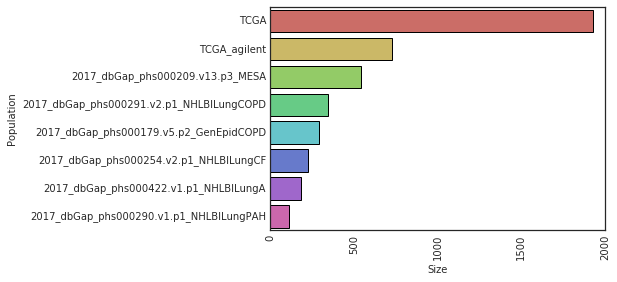

In [7]:
sns.barplot(x='Size', y='Population', data=plotting_df, palette=palette, alpha=1)
plt.xticks(rotation=90)

In [8]:
len(large_populations)

8

In [9]:
palette = sns.color_palette("hls", len(large_populations))

#### Whole genome 4-mer count

TCGA 1929
TCGA_agilent 725
2017_dbGap_phs000209.v13.p3_MESA 541
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 344
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 291
2017_dbGap_phs000254.v2.p1_NHLBILungCF 227
2017_dbGap_phs000422.v1.p1_NHLBILungA 182
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 110


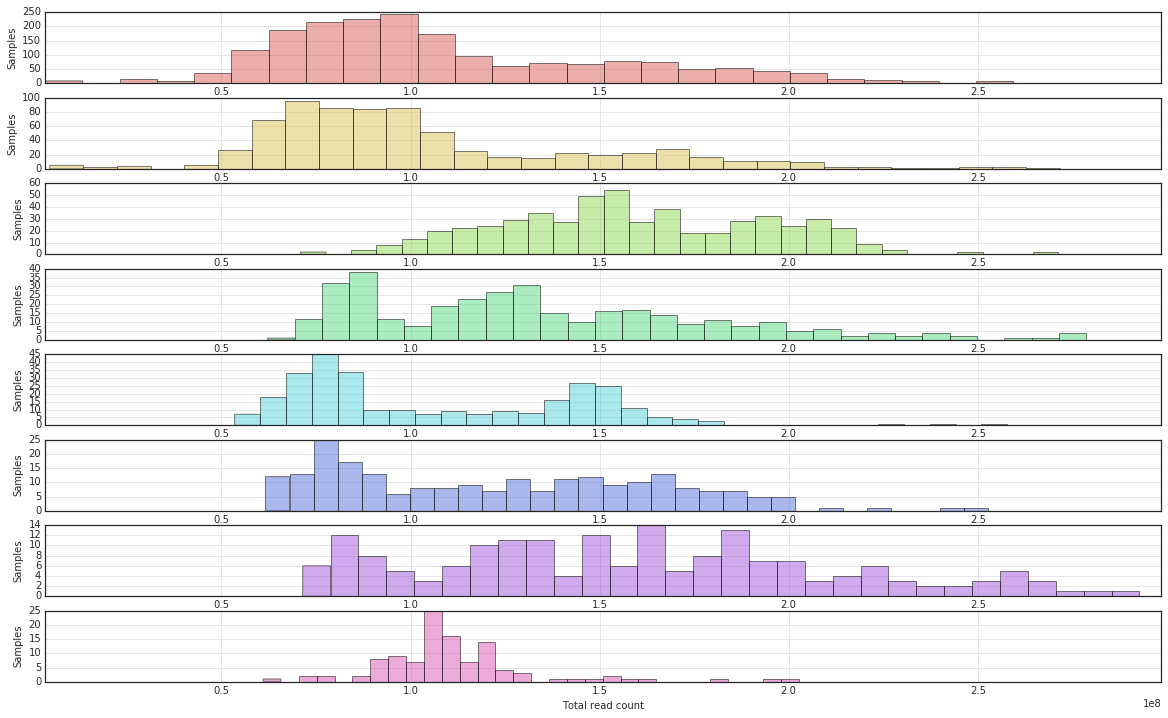

In [22]:
f, axarr = plt.subplots(4, sharex=True, figsize=(20, 12))
minimum, maximum = df_whole.sum(axis=1).min(), df_whole[four_mers].sum(axis=1).max()
for i, population in enumerate(plotting_df.Population):
    try:
        samples = population_dictionary_stripped[population]
        df_tmp = df_whole.ix[samples].dropna()
        print population, len(df_tmp)
        plt.subplot(len(large_populations), 1, i+1)
        df_tmp.sum(axis=1).hist(bins=30, alpha=0.5, color=palette[i])
        plt.xlim(minimum, maximum)
        plt.ylabel('Samples')
        plt.xlabel('Total read count')
    except:
        print population
plt.show()

#### KIR gene-specific reads

In [10]:
df_kir = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_kir_read_counts.csv', index_col=0),
                      pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/components_four_kir_read_counts.csv', index_col=0)])

TCGA 1935
TCGA_agilent 722
2017_dbGap_phs000209.v13.p3_MESA 578
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 353
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 291
2017_dbGap_phs000254.v2.p1_NHLBILungCF 229
2017_dbGap_phs000422.v1.p1_NHLBILungA 191
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 110


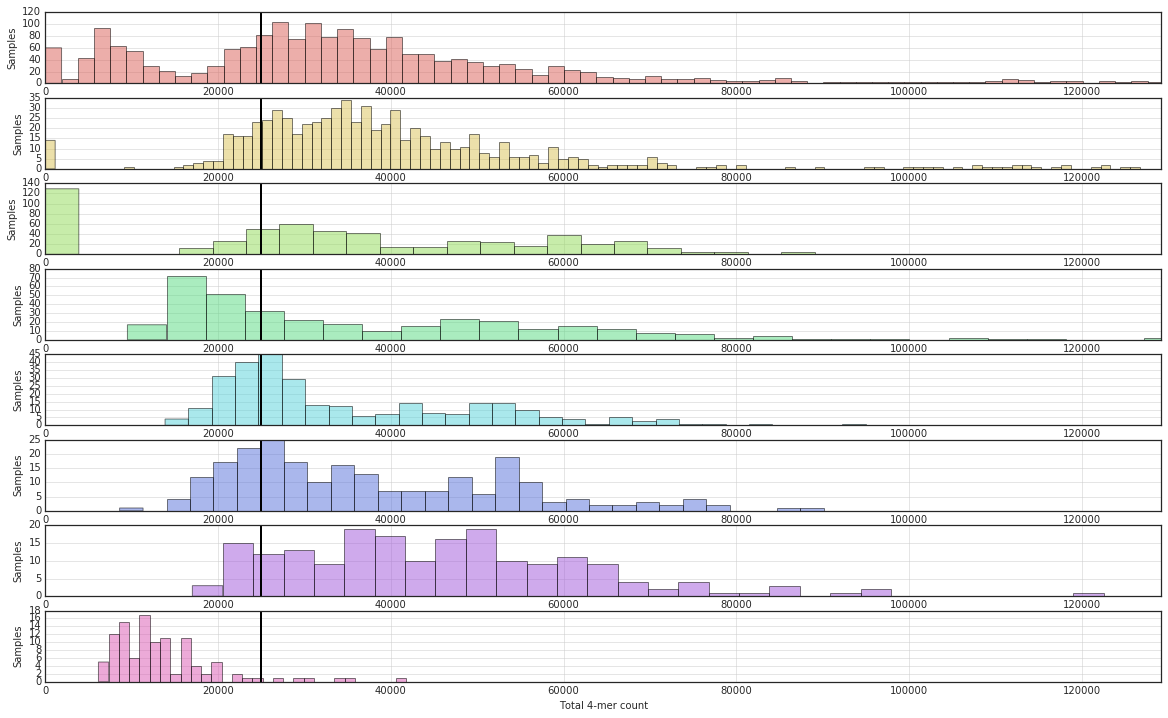

In [11]:
f, axarr = plt.subplots(4, sharex=True, figsize=(20, 12))
minimum, maximum = df_kir.sum(axis=1).min(), df_kir.sum(axis=1).quantile(.975)
for i, population in enumerate(plotting_df.Population):
    try:
        samples = population_dictionary_stripped[population]
        df_tmp = df_kir.ix[samples].dropna()
        print population, len(df_tmp)
        plt.subplot(len(large_populations), 1, i+1)
        if len(samples) > 500:
            df_tmp.sum(axis=1).hist(bins=200, alpha=0.5, color=palette[i])
        else: 
            df_tmp.sum(axis=1).hist(bins=30, alpha=0.5, color=palette[i])
        #plt.axvline(x=1000, ymin=0, ymax = 150, linewidth=2, color='k')
        plt.axvline(x=25000, ymin=0, ymax = 150, linewidth=2, color='k')
        plt.xlim(minimum, maximum)
        plt.ylabel('Samples')
        plt.xlabel('Total 4-mer count')
    except:
        print population
plt.show()

In [12]:
very_low_kir_coverage, low_kir_coverage, sorta_low_kir_coverage = [], [], []
for i, population in enumerate(plotting_df.Population):
    samples = population_dictionary_stripped[population]
    df_tmp = df_kir.ix[samples].dropna()
    very_low_kir_coverage.extend(list(df_tmp.sum(axis=1)[df_tmp.sum(axis=1) < 1000].index))
    low_kir_coverage.extend(list(df_tmp.sum(axis=1)[df_tmp.sum(axis=1) < 15000].index))
    sorta_low_kir_coverage.extend(list(df_tmp.sum(axis=1)[df_tmp.sum(axis=1) < 25000].index))
    print population, len(list(df_tmp.sum(axis=1)[df_tmp.sum(axis=1) < 100].index)), len(list(df_tmp.sum(axis=1)[df_tmp.sum(axis=1) < 15000].index)), len(list(df_tmp.sum(axis=1)[df_tmp.sum(axis=1) < 25000].index))

TCGA 46 372 574
TCGA_agilent 14 15 96
2017_dbGap_phs000209.v13.p3_MESA 129 130 190
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 0 24 151
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 0 1 91
2017_dbGap_phs000254.v2.p1_NHLBILungCF 0 1 59
2017_dbGap_phs000422.v1.p1_NHLBILungA 0 0 23
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 0 77 104


In [13]:
len(very_low_kir_coverage), len(low_kir_coverage), len(sorta_low_kir_coverage)

(203, 620, 1288)

In [14]:
# save and output
with open('/cellar/users/ramarty/Data/kir/normalization/patients_to_exclude.kir_specific_coverage.very_low.txt', 'w') as outfile:
    for patient in very_low_kir_coverage:
        outfile.write('{0}\n'.format(patient))
with open('/cellar/users/ramarty/Data/kir/normalization/patients_to_exclude.kir_specific_coverage.low.txt', 'w') as outfile:
    for patient in low_kir_coverage:
        outfile.write('{0}\n'.format(patient))
with open('/cellar/users/ramarty/Data/kir/normalization/patients_to_exclude.kir_specific_coverage.sorta_low.txt', 'w') as outfile:
    for patient in sorta_low_kir_coverage:
        outfile.write('{0}\n'.format(patient))

Show without low coverage samples

In [15]:
df_kir = df_kir.ix[[x for x in df_kir.index if x not in low_kir_coverage]]

TCGA 1563
TCGA_agilent 707
2017_dbGap_phs000209.v13.p3_MESA 604
2017_dbGap_phs000291.v2.p1_NHLBILungCOPD 347
2017_dbGap_phs000179.v5.p2_GenEpidCOPD 290
2017_dbGap_phs000254.v2.p1_NHLBILungCF 228
2017_dbGap_phs000422.v1.p1_NHLBILungA 191
2017_dbGap_phs000290.v1.p1_NHLBILungPAH 51


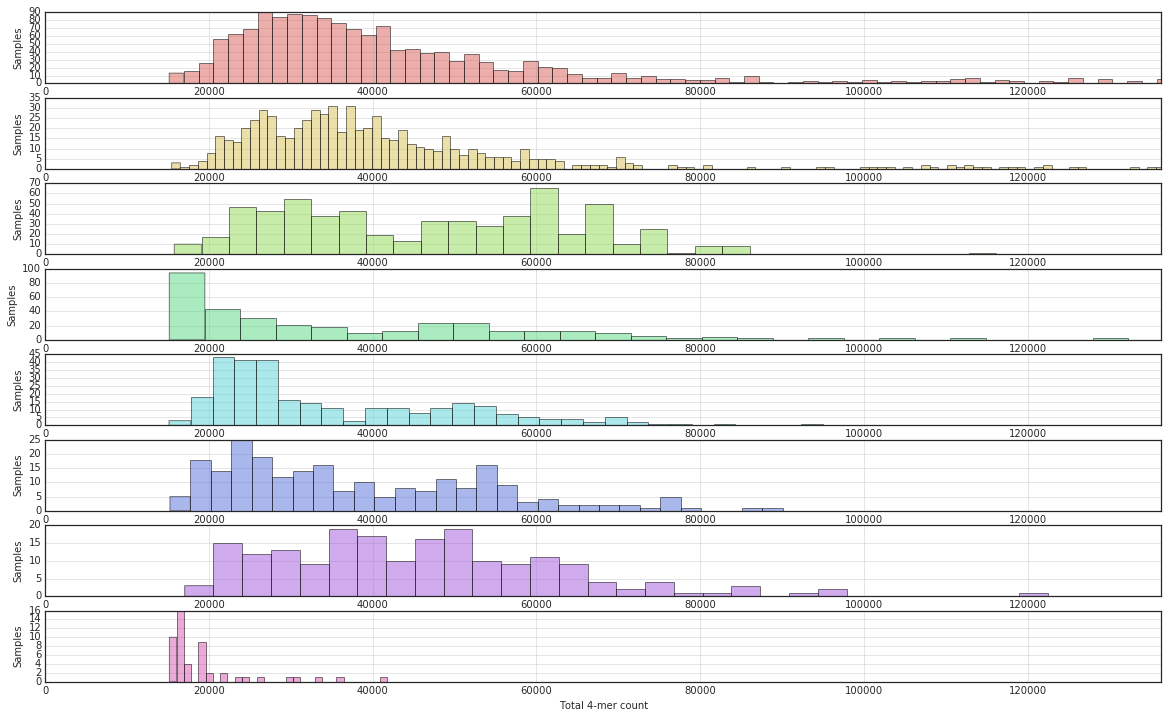

In [16]:
f, axarr = plt.subplots(4, sharex=True, figsize=(20, 12))
minimum, maximum = df_kir.sum(axis=1).min(), df_kir.sum(axis=1).quantile(.975)
for i, population in enumerate(plotting_df.Population):
    try:
        samples = population_dictionary_stripped[population]
        df_tmp = df_kir.ix[samples].dropna()
        print population, len(df_tmp)
        plt.subplot(len(large_populations), 1, i+1)
        if len(samples) > 500:
            df_tmp.sum(axis=1).hist(bins=200, alpha=0.5, color=palette[i])
        else: 
            df_tmp.sum(axis=1).hist(bins=30, alpha=0.5, color=palette[i])
        plt.xlim(minimum, maximum)
        plt.ylabel('Samples')
        plt.xlabel('Total 4-mer count')
    except:
        print population
plt.show()